<a href="https://colab.research.google.com/github/nicolashenrique921/Dio-HTML/blob/main/GTD_revis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Global Terrorism Database (GTD)**

O Global Terrorism Database (GTD) é um dos mais extensos e abrangentes bancos de dados sobre incidentes terroristas em todo o mundo. Mantido pelo National Consortium for the Study of Terrorism and Responses to Terrorism (START) da Universidade de Maryland, o GTD oferece uma visão detalhada e sistemática de eventos terroristas desde 1970 até os dias atuais.

O GTD foi criado com o objetivo de fornecer uma base de dados confiável e acessível para pesquisadores, formuladores de políticas, analistas de segurança e o público em geral, interessados em entender a natureza e a evolução do terrorismo global. O banco de dados é atualizado anualmente e inclui informações sobre mais de 200.000 incidentes terroristas, cobrindo uma ampla gama de variáveis que ajudam a contextualizar e analisar cada evento.

A seguir a descripção das variaveis:

* EventID: Um identificador único para cada incidente registrado no banco de dados.
* Year/Month/Day: Inclui o dia, mês e ano em que o incidente ocorreu.
* Country: Informações sobre o país onde o incidente ocorreu.
* Region: Informações sobre o região onde o incidente ocorreu.
* State: Informações sobre o estado onde o incidente ocorreu.
* Cidade: Informações sobre o cidade onde o incidente ocorreu.
* AttackType: Classificação do tipo de ataque, como bombardeio, sequestro, ataque armado, etc.
* Group: Nome do grupo ou organização responsável pelo ataque, se conhecido.
* Target: Descrição do alvo do ataque, que pode incluir civis, militares, governos, empresas, etc.
* WeaponType: Tipo de armas ou explosivos utilizados no ataque.
* Killed: Dados sobre o número de pessoas *mortas* como resultado do incidente.
* Wounded: Dados sobre o número de pessoas *feridas* como resultado do incidente.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.precision', 2)

In [2]:
# Carregar o dataset Iris usando pandas
df = pd.read_csv('/content/sample_data/globalterrorismdb_revisao.tsv', sep='\t', on_bad_lines='warn')

In [3]:
# Check the first 10 rows of the dataset
df.head(10)

,EventID,Year,Month,Day,Country,Region,State,City,AttackType,Target,Group,Weapontype,Killed,Wounded
0,"1,97E+11",1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,"1,97E+11",1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,"1,97001E+11",1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,"1,97001E+11",1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,"1,97001E+11",1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN
5,"1,97001E+11",1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,Black Nationalists,Firearms,0.0,0.0
6,"1,97001E+11",1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Tupamaros (Uruguay),Firearms,0.0,0.0
7,"1,97001E+11",1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Unknown,Explosives,0.0,0.0
8,"1,97001E+11",1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,New Year's Gang,Incendiary,0.0,0.0
9,"1,97001E+11",1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),New Year's Gang,Incendiary,0.0,0.0


In [4]:
# Size of dataset
df.shape

(69835, 14)

In [5]:
# Check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69835 entries, 0 to 69834
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EventID     69835 non-null  object 
 1   Year        69835 non-null  int64  
 2   Month       69835 non-null  int64  
 3   Day         69835 non-null  int64  
 4   Country     69835 non-null  object 
 5   Region      69835 non-null  object 
 6   State       69424 non-null  object 
 7   City        69835 non-null  object 
 8   AttackType  69835 non-null  object 
 9   Target      69835 non-null  object 
 10  Group       69835 non-null  object 
 11  Weapontype  69835 non-null  object 
 12  Killed      63689 non-null  float64
 13  Wounded     61505 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 7.5+ MB


In [6]:
# Statistical summary
df.describe()

,Year,Month,Day,Killed,Wounded
count,69835.00,69835.00,69835.00,63689.00,61505.00
mean,1987.25,6.47,15.38,2.20,2.21
std,6.72,3.39,8.80,10.07,30.34
min,1970.00,0.00,0.00,0.00,0.00
25%,1982.00,4.00,8.00,0.00,0.00
50%,1988.00,6.00,15.00,0.00,0.00
75%,1992.00,9.00,23.00,1.00,0.00
max,1999.00,12.00,31.00,1180.00,5500.00


In [8]:
#Checking missing values
df.isnull().sum()

,0
EventID,0
Year,0
Month,0
Day,0
Country,0
Region,0
State,3898
City,4832
AttackType,2671
Target,840


In [7]:
# Limpar o dataset

# Substituir strings vazias e "unknown" por NaN
df.replace('', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)

# Remover linhas com valores NaN
df_cleaned = df.dropna()

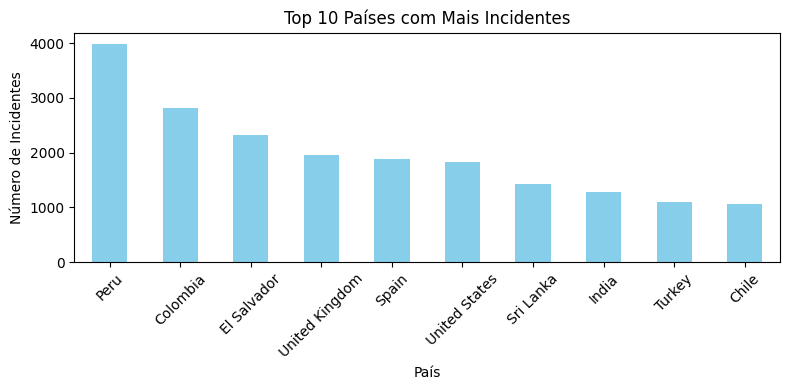

In [9]:
# Contagem de incidentes por país
country_counts = df_cleaned['Country'].value_counts()
top_10_countries = country_counts.head(10)

# Gráfico de barras para os 10 países com mais incidentes
plt.figure(figsize=(8, 4))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Mais Incidentes')
plt.xlabel('País')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

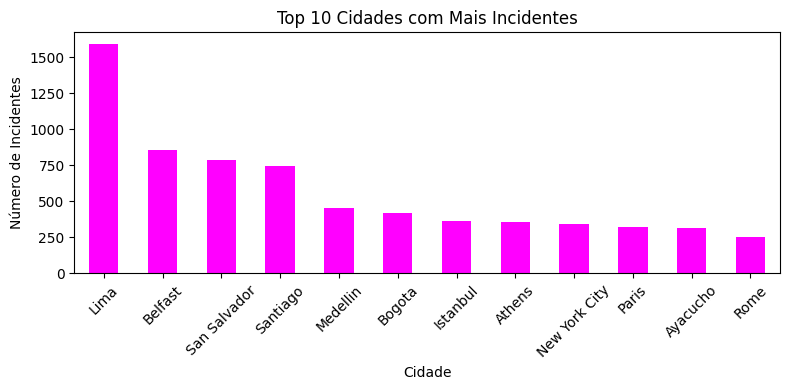

In [10]:
# Contagem de incidentes por cidade
city_counts = df_cleaned['City'].value_counts()
top_10_city = city_counts.head(12)

# Gráfico de barras para os 12 cidades com mais incidentes
plt.figure(figsize=(8, 4))
top_10_city.plot(kind='bar', color='magenta')
plt.title('Top 10 Cidades com Mais Incidentes')
plt.xlabel('Cidade')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Juntar as colunas Year, Month e Day em uma única coluna

# Criar a coluna de data
#df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']].astype(int), format='%Y%m%d', errors='coerce')


# Remover as colunas Year, Month e Day se não forem mais necessárias
df_cleaned.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

<ipython-input-11-27827c416070>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']].astype(int), format='%Y%m%d', errors='coerce')
<ipython-input-11-27827c416070>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)


In [12]:
df_cleaned['Date'].head(10)

,Date
5,1970-01-01
6,1970-01-02
8,1970-01-02
9,1970-01-03
10,1970-01-01
11,1970-01-06
13,1970-01-09
14,1970-01-09
17,1970-01-12
18,1970-01-12


In [13]:
# Exportar para um arquivo .tsv
df_cleaned.to_csv('GTD_cleaned.tsv', sep='\t', index=False)

<ipython-input-14-ddfb7fd61e07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


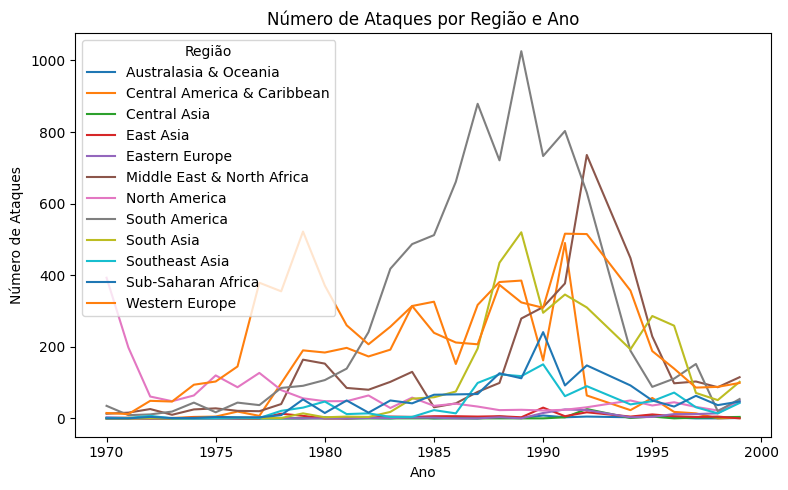

In [14]:
# Ataques terroristas por região

# Criar uma coluna de ano a partir da coluna Date
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Gráfico de linha para ataques por região e ano
attacks_by_region_year = df_cleaned.groupby(['Region', 'Year']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 5))
for region in attacks_by_region_year.index:
    plt.plot(attacks_by_region_year.columns, attacks_by_region_year.loc[region], label=region)

plt.title('Número de Ataques por Região e Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ataques')
plt.legend(title='Região')
plt.tight_layout()
plt.show()

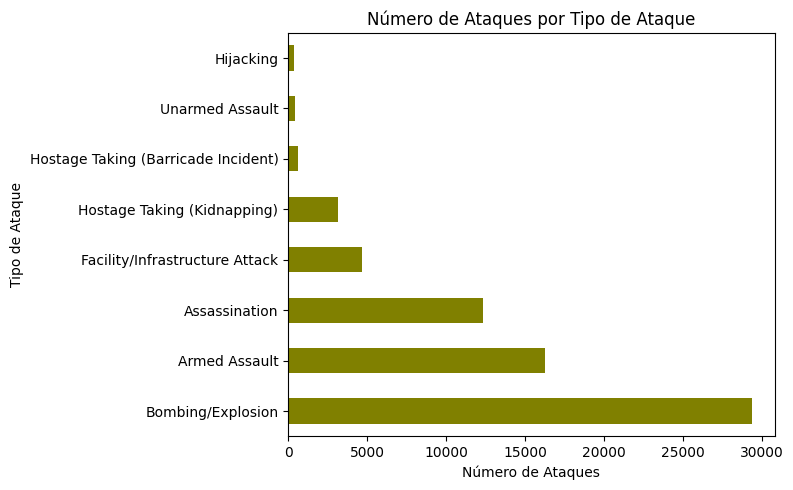

In [15]:
# Contar o número de ataques por tipo de ataque
attacks_by_type = df['AttackType'].value_counts()

# Criar o gráfico de barras horizontal
plt.figure(figsize=(8, 5))
attacks_by_type.plot(kind='barh', color='olive')
plt.title('Número de Ataques por Tipo de Ataque')
plt.xlabel('Número de Ataques')
plt.ylabel('Tipo de Ataque')
plt.tight_layout()
plt.show()